In [9]:
import pandas as pd
df = pd.read_csv('../cleaned_dataset/labelled_ble_data.csv')

Top 3 common beacons: [np.int64(14), np.int64(4), np.int64(9)]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7528\4261424521.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([kitchen_rssi, cafeteria_rssi],
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7528\4261424521.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([kitchen_rssi, cafeteria_rssi],
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7528\4261424521.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([kitchen_rssi, cafeteria_rssi],


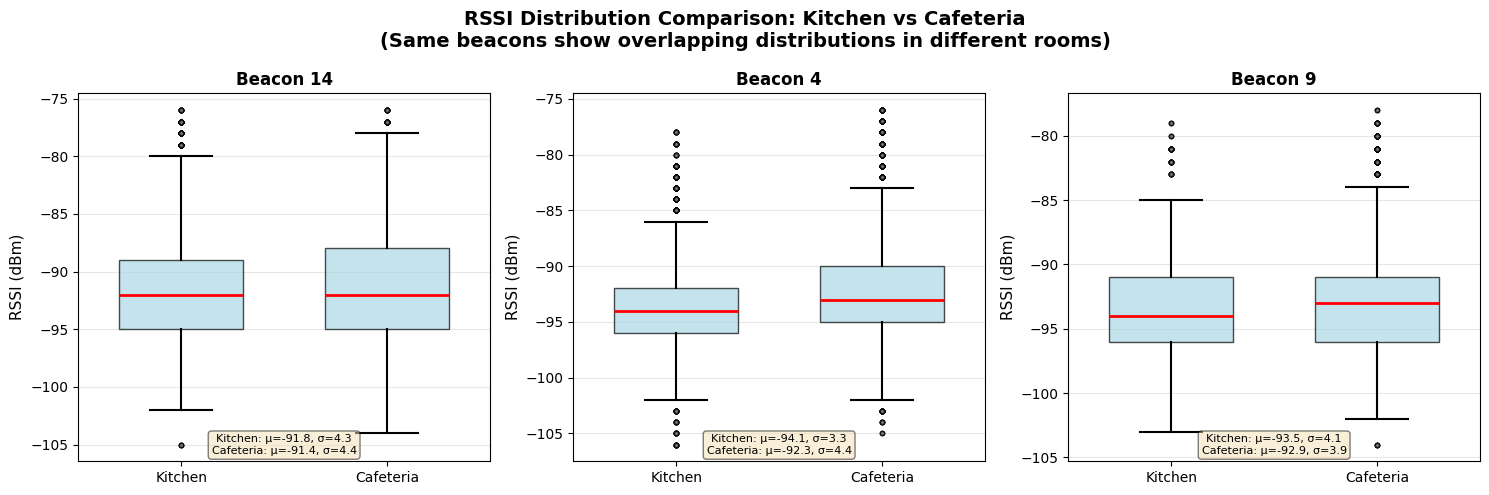


=== RSSI Distribution Statistics ===

Beacon 14:
  Kitchen:   Mean=-91.75, Std=4.33, Range=[-105, -76]
  Cafeteria: Mean=-91.39, Std=4.40, Range=[-104, -76]
  → Overlapping ranges? True

Beacon 4:
  Kitchen:   Mean=-94.09, Std=3.32, Range=[-106, -78]
  Cafeteria: Mean=-92.35, Std=4.38, Range=[-105, -76]
  → Overlapping ranges? True

Beacon 9:
  Kitchen:   Mean=-93.51, Std=4.06, Range=[-103, -79]
  Cafeteria: Mean=-92.89, Std=3.87, Range=[-104, -78]
  → Overlapping ranges? True


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Filter for Kitchen and Cafeteria only
kitchen_df = df[df['room'] == 'kitchen']
cafeteria_df = df[df['room'] == 'cafeteria']

# Find common beacons between both rooms
kitchen_beacons = set(kitchen_df['mac address'].unique())
cafeteria_beacons = set(cafeteria_df['mac address'].unique())
common_beacons = kitchen_beacons & cafeteria_beacons

# Get top 3 most frequent beacons among the common ones
# Count total appearances in both rooms
common_beacon_counts = {}
for beacon in common_beacons:
    count = len(kitchen_df[kitchen_df['mac address'] == beacon]) + \
            len(cafeteria_df[cafeteria_df['mac address'] == beacon])
    common_beacon_counts[beacon] = count

# Sort and get top 3
top_3_common = sorted(common_beacon_counts.items(), key=lambda x: x[1], reverse=True)[:3]
top_3_beacons = [beacon for beacon, count in top_3_common]

print(f"Top 3 common beacons: {top_3_beacons}")

# Create figure with 3 subplots (one per beacon)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, beacon in enumerate(top_3_beacons):
    # Get RSSI values for this beacon in both rooms
    kitchen_rssi = kitchen_df[kitchen_df['mac address'] == beacon]['RSSI'].values
    cafeteria_rssi = cafeteria_df[cafeteria_df['mac address'] == beacon]['RSSI'].values
    
    # Create box plot
    bp = axes[idx].boxplot([kitchen_rssi, cafeteria_rssi],
                           labels=['Kitchen', 'Cafeteria'],
                           patch_artist=True,
                           widths=0.6,
                           showfliers=True,  # Show outliers
                           medianprops=dict(color='red', linewidth=2),
                           boxprops=dict(facecolor='lightblue', alpha=0.7),
                           whiskerprops=dict(linewidth=1.5),
                           capprops=dict(linewidth=1.5),
                           flierprops=dict(marker='o', markerfacecolor='gray', 
                                         markersize=3, alpha=0.5))
    
    axes[idx].set_ylabel('RSSI (dBm)', fontsize=11)
    axes[idx].set_title(f'Beacon {beacon}', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Calculate and display statistics
    kitchen_mean = np.mean(kitchen_rssi)
    kitchen_std = np.std(kitchen_rssi)
    cafeteria_mean = np.mean(cafeteria_rssi)
    cafeteria_std = np.std(cafeteria_rssi)
    
    # Add text annotation showing overlap
    axes[idx].text(0.5, 0.02, 
                  f'Kitchen: μ={kitchen_mean:.1f}, σ={kitchen_std:.1f}\n'
                  f'Cafeteria: μ={cafeteria_mean:.1f}, σ={cafeteria_std:.1f}',
                  transform=axes[idx].transAxes,
                  fontsize=8,
                  ha='center',
                  bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Overall title
fig.suptitle('RSSI Distribution Comparison: Kitchen vs Cafeteria\n'
             '(Same beacons show overlapping distributions in different rooms)', 
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n=== RSSI Distribution Statistics ===")
for beacon in top_3_beacons:
    kitchen_rssi = kitchen_df[kitchen_df['mac address'] == beacon]['RSSI']
    cafeteria_rssi = cafeteria_df[cafeteria_df['mac address'] == beacon]['RSSI']
    
    print(f"\nBeacon {beacon}:")
    print(f"  Kitchen:   Mean={kitchen_rssi.mean():.2f}, Std={kitchen_rssi.std():.2f}, "
          f"Range=[{kitchen_rssi.min():.0f}, {kitchen_rssi.max():.0f}]")
    print(f"  Cafeteria: Mean={cafeteria_rssi.mean():.2f}, Std={cafeteria_rssi.std():.2f}, "
          f"Range=[{cafeteria_rssi.min():.0f}, {cafeteria_rssi.max():.0f}]")
    print(f"  → Overlapping ranges? {kitchen_rssi.min() <= cafeteria_rssi.max() and cafeteria_rssi.min() <= kitchen_rssi.max()}")

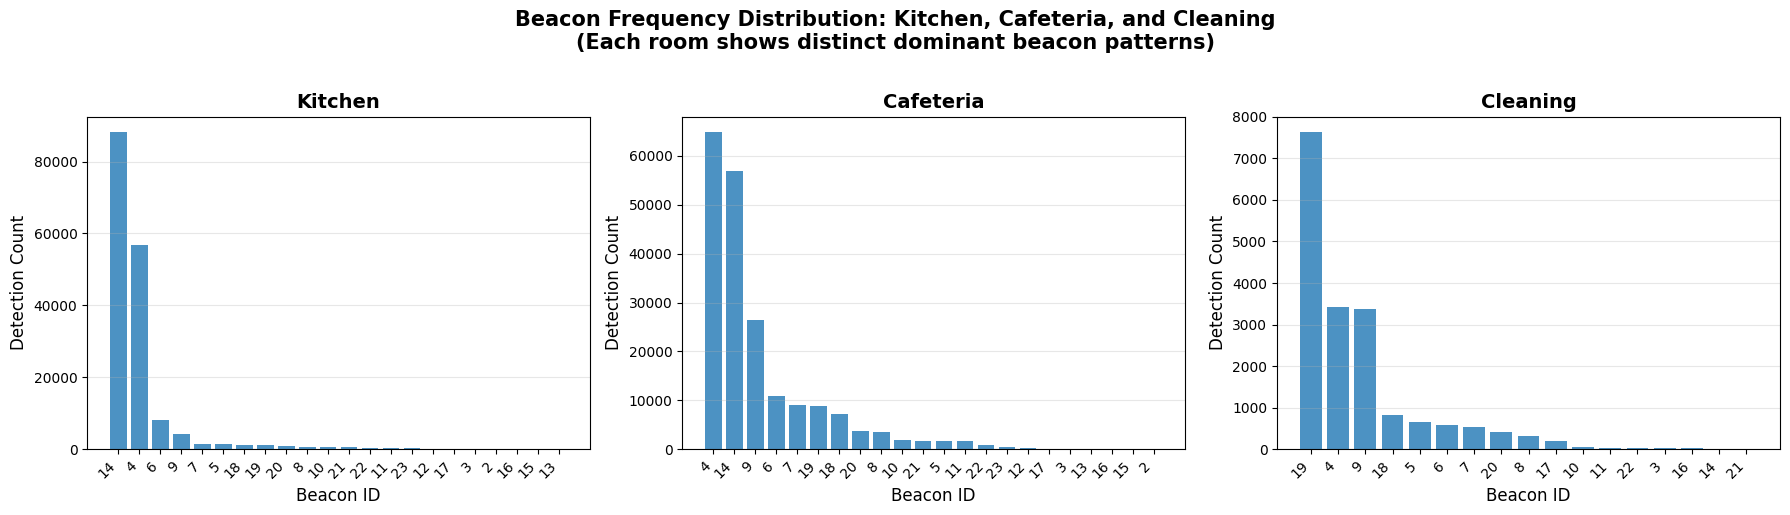

In [11]:
import matplotlib.pyplot as plt

# Select only 3 rooms to plot
target_rooms = ['kitchen', 'cafeteria', 'cleaning']

# Create subplots - 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot each room's beacon frequency distribution
for idx, room in enumerate(target_rooms):
    # Get value counts and keep in descending order (default)
    room_data = df[df['room'] == room]['mac address'].value_counts()
    
    axes[idx].bar(range(len(room_data)), room_data.values, color='#1f77b4', alpha=0.8)
    axes[idx].set_title(f'{room.title()}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Beacon ID', fontsize=12)
    axes[idx].set_ylabel('Detection Count', fontsize=12)
    axes[idx].set_xticks(range(len(room_data)))
    axes[idx].set_xticklabels(room_data.index, rotation=45, ha='right')
    axes[idx].grid(axis='y', alpha=0.3)

# Overall title
fig.suptitle('Beacon Frequency Distribution: Kitchen, Cafeteria, and Cleaning\n(Each room shows distinct dominant beacon patterns)', 
             fontsize=15, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()